![logo](../Data/JFM-notebooks-logo.jpg)

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r"\usepackage{amsmath}")
plt.rc('font', family='serif')

In [4]:
# Loading datasets
ds_lp = xr.open_dataset('../Data/solver_lowpass_x_y_omega_2_Nint_1_strat_3_T_40.nc')

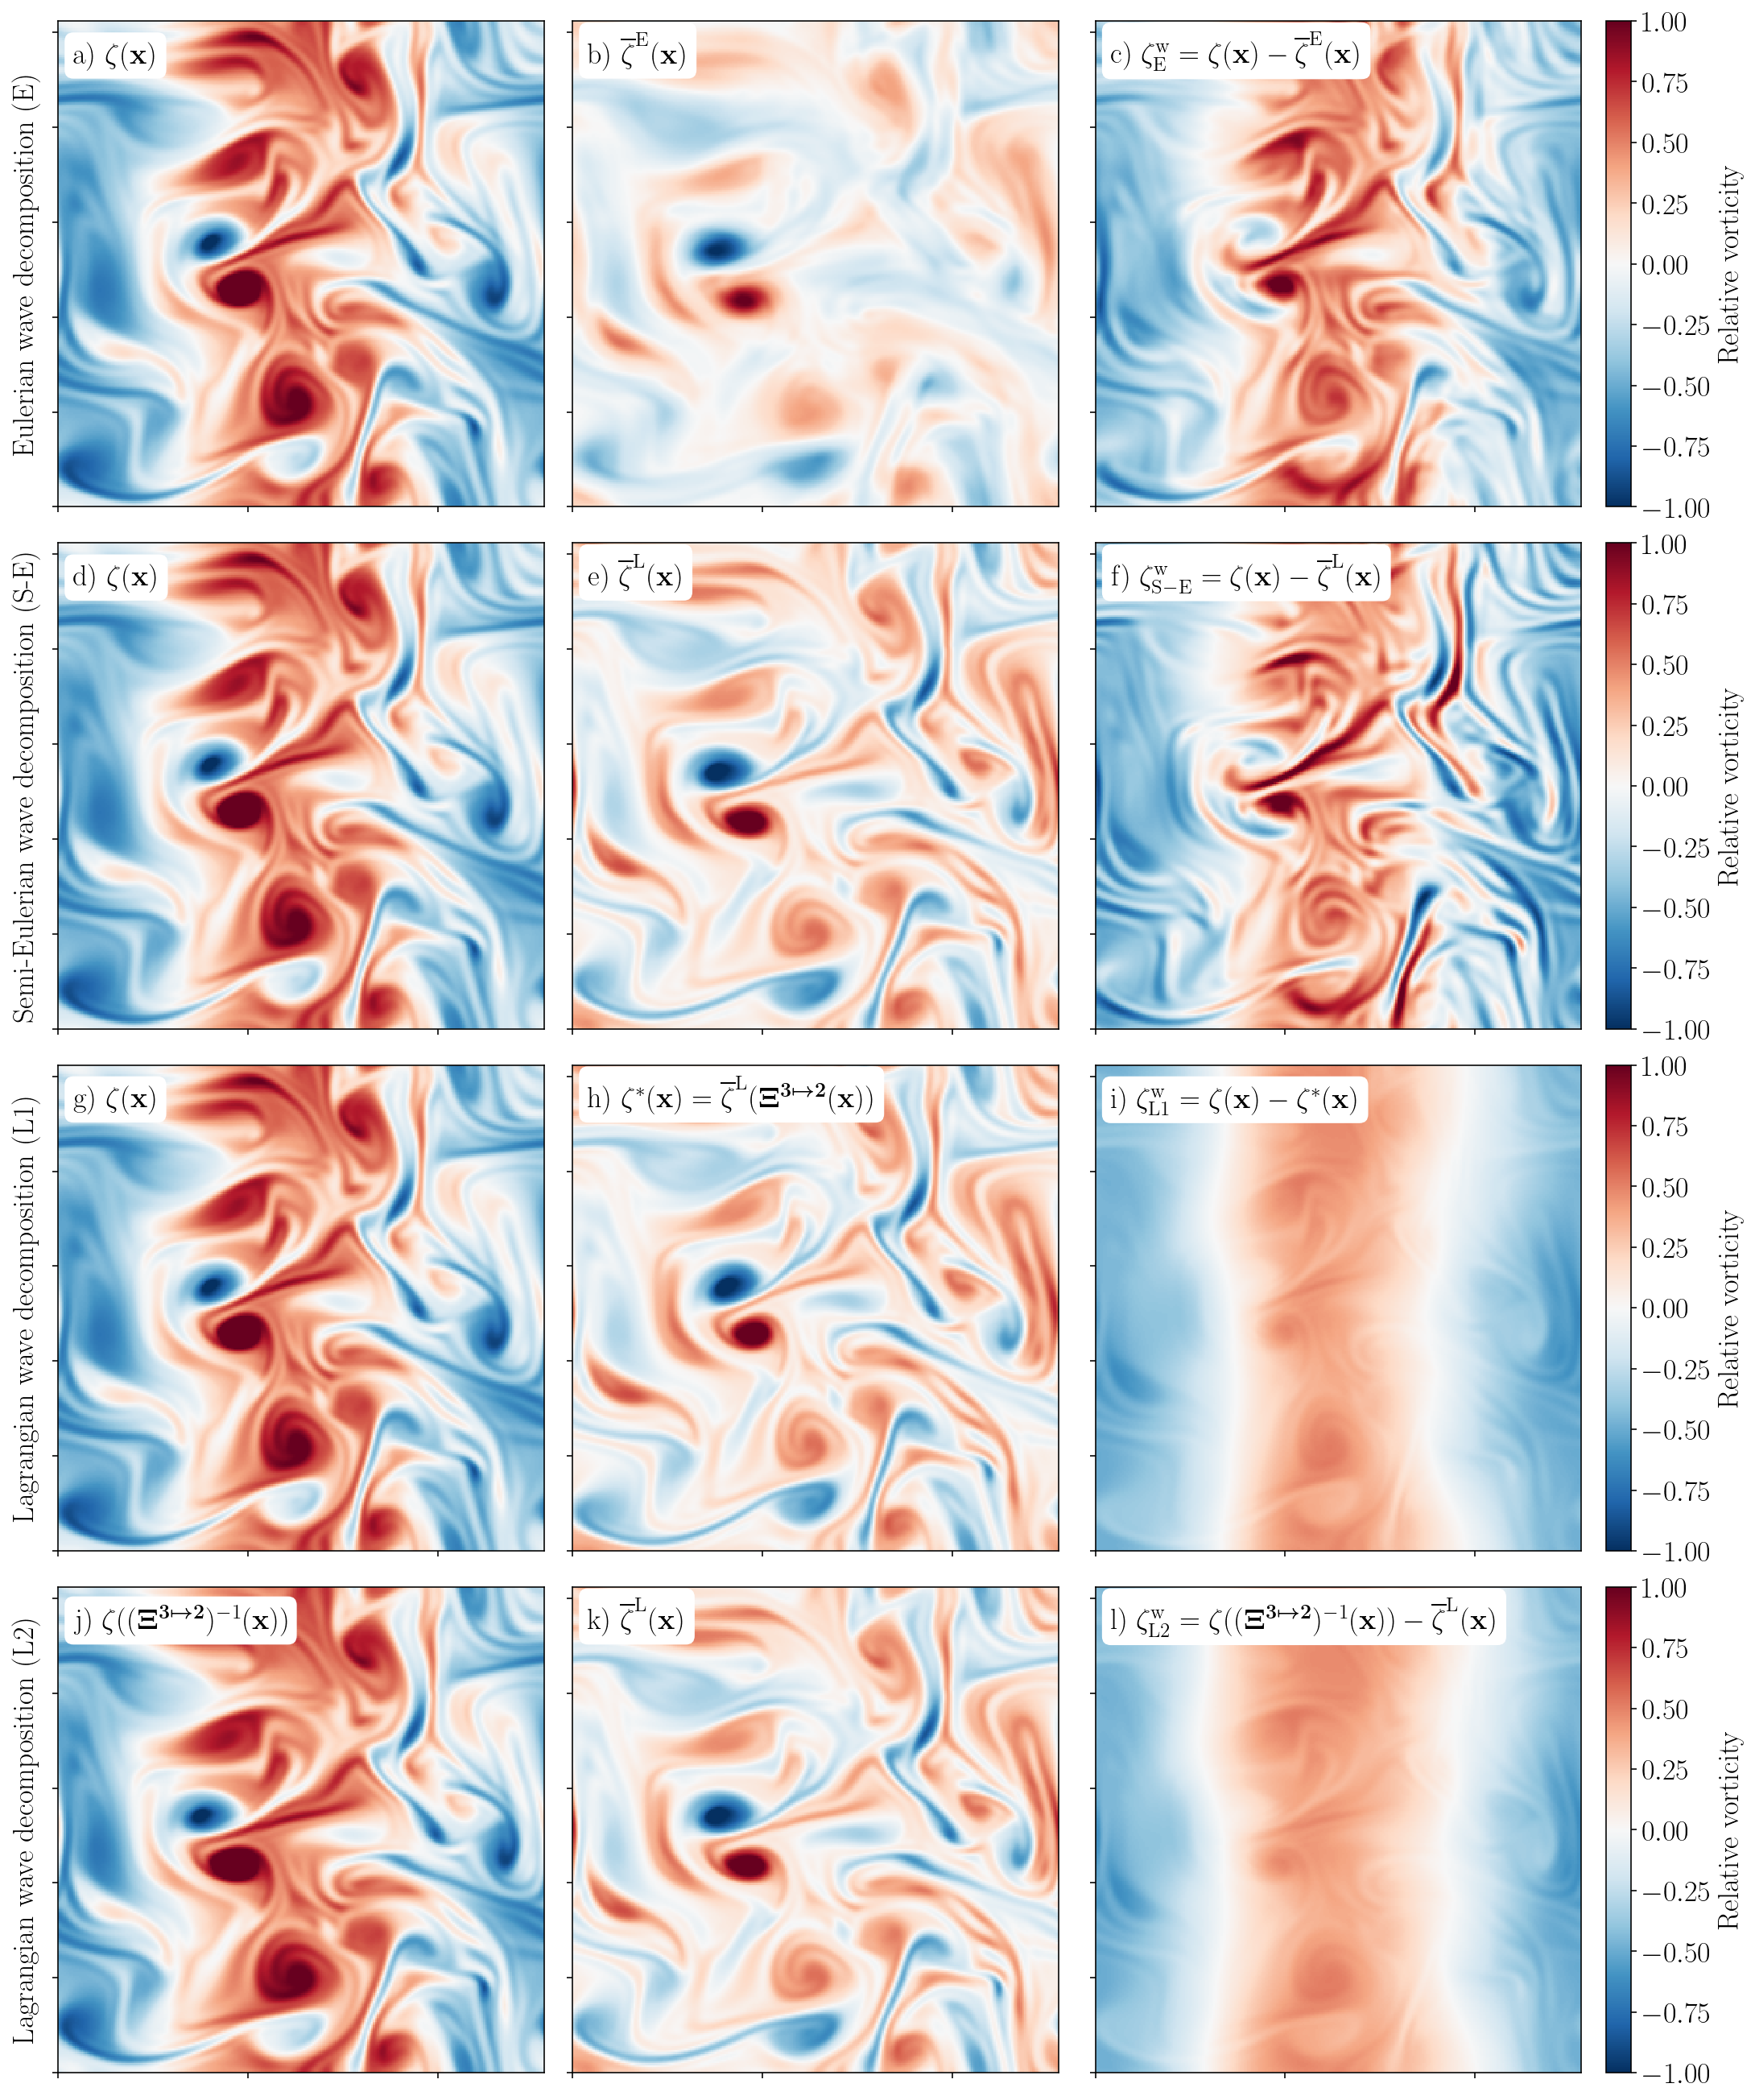

In [5]:
# Initialising figure
fig, axes = plt.subplots(4,3,figsize = (15,18),constrained_layout=True)

# Plotting
vmin = -1
vmax = 1
p0=axes[0,0].pcolormesh(ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[0,1].pcolormesh(ds_lp.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[0,2].pcolormesh(ds_lp.z_inst - ds_lp.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[1,0].pcolormesh(ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[1,1].pcolormesh(ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[1,2].pcolormesh(ds_lp.z_inst - ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[2,0].pcolormesh(ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[2,1].pcolormesh(ds_lp.z_LM_at_mid,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[2,2].pcolormesh(ds_lp.z_inst-ds_lp.z_LM_at_mid,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[3,0].pcolormesh(ds_lp.z_inst_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[3,1].pcolormesh(ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[3,2].pcolormesh(ds_lp.z_inst_at_mean-ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')

fig.colorbar(p0,ax=axes[0,2],label='Relative vorticity')
fig.colorbar(p0,ax=axes[1,2],label='Relative vorticity')
fig.colorbar(p0,ax=axes[2,2],label='Relative vorticity')
fig.colorbar(p0,ax=axes[3,2],label='Relative vorticity')

textposx = 8
textposy = 234
bbox=dict(facecolor='white', edgecolor='none', boxstyle='round')
axes[0,0].text(textposx,textposy,r'a) $\zeta(\mathbf{x})$',bbox=bbox)
axes[0,1].text(textposx,textposy,r'b) $\overline{\zeta}^\mathrm{E}(\mathbf{x})$',bbox=bbox)
axes[0,2].text(textposx,textposy,r'c) $\zeta_\mathrm{E}^\mathrm{w} = \zeta(\mathbf{x}) - \overline{\zeta}^\mathrm{E}(\mathbf{x})$',bbox=bbox)
axes[1,0].text(textposx,textposy,r'd) $\zeta(\mathbf{x})$',bbox=bbox)
axes[1,1].text(textposx,textposy,r'e) $\overline{\zeta}^\mathrm{L}(\mathbf{x})$',bbox=bbox)
axes[1,2].text(textposx,textposy,r'f) $\zeta_\mathrm{S-E}^\mathrm{w} = \zeta(\mathbf{x}) - \overline{\zeta}^\mathrm{L}(\mathbf{x})$',bbox=bbox)
axes[2,0].text(textposx,textposy,r'g) $\zeta(\mathbf{x})$',bbox=bbox)
axes[2,1].text(textposx,textposy,r'h) $\zeta^*(\mathbf{x}) = \overline{\zeta}^\mathrm{L}(\boldsymbol{\Xi^{3 \mapsto 2}}(\mathbf{x}))$',bbox=bbox)
axes[2,2].text(textposx,textposy,r'i) $\zeta_\mathrm{L1}^\mathrm{w} = \zeta(\mathbf{x}) - \zeta^*(\mathbf{x})$',bbox=bbox)
axes[3,0].text(textposx,textposy,r'j) $\zeta((\boldsymbol{\Xi^{3 \mapsto 2}})^{-1}(\mathbf{x}))$',bbox=bbox)
axes[3,1].text(textposx,textposy,r'k) $\overline{\zeta}^\mathrm{L}(\mathbf{x})$',bbox=bbox)
axes[3,2].text(textposx,textposy,r'l) $\zeta_\mathrm{L2}^\mathrm{w} = \zeta((\boldsymbol{\Xi^{3 \mapsto 2}})^{-1}(\mathbf{x})) - \overline{\zeta}^\mathrm{L}(\mathbf{x})$',bbox=bbox)

# Formatting
[axes[i,j].set_aspect('equal') for i in range(4) for j in range(3)];
axes[0,0].set_ylabel('Eulerian wave decomposition (E)')
axes[1,0].set_ylabel('Semi-Eulerian wave decomposition (S-E)')
axes[2,0].set_ylabel(r'Lagrangian wave decomposition (L1)')
axes[3,0].set_ylabel(r'Lagrangian wave decomposition (L2)')
[axes[i,j].axes.set_xticklabels([]) for i in range(4) for j in range(3)];
[axes[i,j].axes.set_yticklabels([]) for i in range(4) for j in range(3)];

fig.savefig('Figure-5.png',dpi=200,bbox_inches='tight')


The four different wave decompositions: (top) Eulerian, (second row) semi-Eulerian, (third row) Lagrangian first definition, and (bottom) Lagrangian second definition. For each row, the middle 'mean' field is subtracted from the left 'instantaneous' field to give the right 'wave' field. The flow parameters are as for figure 2, and strategy 3 is used.

More data variables are available in the xarray dataset:

In [6]:
ds_lp

<xarray.Dataset>
Dimensions:         (x: 256, t: 100)
Coordinates:
  * x               (x) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
  * t               (t) float64 20.0 20.2 20.4 20.6 20.8 ... 39.2 39.4 39.6 39.8
    y               float64 2.798
Data variables:
    z_inst          (t, x) float64 -0.3126 -0.5 -0.6376 ... -0.4035 -0.3782
    z_EM            (t, x) float64 0.1638 0.162 0.1552 ... -0.1046 -0.1017
    z_inst_at_end   (t, x) float64 -0.1501 -0.01493 -0.08961 ... -0.3761 -0.4408
    z_LM_at_mid     (t, x) float64 0.224 0.04242 -0.1011 ... -0.05495 -0.01308
    z_LM_at_end     (t, x) float64 -0.03931 0.02346 0.0009196 ... 0.2116 0.07469
    Xi31_x          (t, x) float64 -0.0416 -0.07058 -0.07187 ... 5.35 5.38 5.423
    Xi31_y          (t, x) float64 4.578 4.636 4.639 4.6 ... 2.624 2.502 2.391
    z_inst_at_mean  (t, x) float64 -0.1235 -0.2793 -0.4907 ... -0.2394 -0.3945
    z_LM_at_mean    (t, x) float64 0.4222 0.2545 0.04991 ... 0.0006664 -0.07258
    Xi32_x          (t, x) float64 0.04052 0.06043 0.08092 ... 6.386 6.408 6.431
    Xi32_y          (t, x) float64 2.884 2.883 2.882 2.881 ... 2.734 2.734 2.735
    timestep        (t) int32 6600 6666 6732 6798 ... 12936 13002 13068 13134
Attributes:
    description:  SW GLM solver outputs